<a href="https://colab.research.google.com/github/sandaruwanWGMA/Sign-Language-MNIST-Multi-Class-Classification/blob/main/Sign_Language_MNIST_Multi_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sign Language MNIST Multi-Class Classification: Decoding the Alphabet through Convolutional Neural Networks

In this Note book, I will work on a multi-class classification problem. I will be using the [Sign Language MNIST](https://www.kaggle.com/datamunge/sign-language-mnist) dataset, which contains 28x28 images of hands depicting the 26 letters of the english alphabet.


In [4]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

Download the training and test sets (the test set will actually be used as a validation set):

In [5]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:00<00:00, 218MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 147MB/s]


Define some globals with the path to both files you just downloaded:

In [6]:
TRAINING_FILE = './sign_mnist_train.csv'
VALIDATION_FILE = './sign_mnist_test.csv'

In [7]:
with open(TRAINING_FILE) as training_file:
  line = training_file.readline()
  print(f"First line (header) looks like this:\n{line}")
  line = training_file.readline()
  print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

 ## Parsing the dataset

 To handle the dataset parsing, I've created a Python function called parse_data_from_input. This function takes a file path as input and is designed to efficiently process the Sign Language MNIST dataset. The dataset file structure includes a header row and subsequent rows with 785 comma-separated values representing the label and pixel values of each image (28x28). To achieve this, I've provided two distinct approaches to implement the function.

Option 1 involves using csv.reader, which iterates through the CSV file rows. In each iteration, the label is extracted from row[0], while the pixel values are obtained from row[1:]. The pixel values are then reshaped into a 28x28 matrix using functions like np.array_split or np.reshape. Both label and image data are stored in separate lists and later converted to numpy arrays with a data type of float64. This method ensures a clean and understandable implementation.

Option 2 suggests using np.loadtxt, a powerful function for loading data from text files. This option provides a concise and potentially faster solution. By skipping the header row and specifying the delimiter as a comma, the function directly generates numpy arrays for labels and pixel values, achieving the same result as Option 1.

Regardless of the chosen method, the function aims to complete its execution in under a minute, ensuring efficiency in handling the Sign Language MNIST dataset.

In [8]:
# GRADED FUNCTION: parse_data_from_input
def parse_data_from_input(filename):
  """
  Parses the images and labels from a CSV file

  Args:
    filename (string): path to the CSV file

  Returns:
    images, labels: tuple of numpy arrays containing the images and labels
  """
  with open(filename) as file:
    ### START CODE HERE

    # Use csv.reader, passing in the appropriate delimiter
    # Remember that csv.reader can be iterated and returns one line in each iteration
    csv_reader = csv.reader(file, delimiter=' ')

    labels = []
    images = []
    count = 0
    for row in csv_reader:
      if (count > 0):
        row = row[0].split(',')
        row = list(map(float, row))
        # import pdb; pdb.set_trace()
        images.append(row[1:])
        labels.append(row[0])
      count += 1

    # reshape the images
    images, labels = np.array(images), np.array(labels)
    to_size = int(images.shape[1]**0.5)
    images = np.reshape(images, (images.shape[0], to_size, to_size))


    ### END CODE HERE

    return images, labels

In [9]:
# Test your function
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (27455, 28, 28) and dtype: float64
Training labels has shape: (27455,) and dtype: float64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: float64


## Visualizing the numpy arrays

Now that I have converted the initial csv data into a format that is compatible with computer vision tasks, take a moment to actually see how the images of the dataset look like:

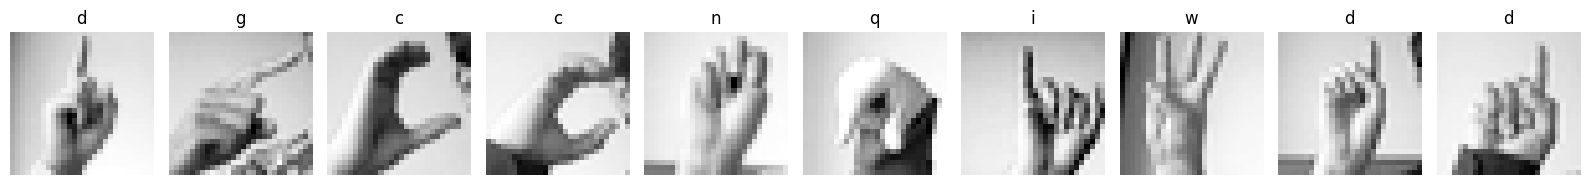

In [10]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(training_images, training_labels)

## Creating the generators for the CNN

In the process of setting up my Convolutional Neural Network (CNN) for the Sign Language MNIST project, I've reached the stage of creating generators that facilitate the efficient feeding of data into Keras' `ImageDataGenerator`. To achieve this, I've implemented the `train_val_generators` function. It's worth noting that, in contrast to previous assignments, this dataset features images of uniform resolution, eliminating the need for specifying a custom `target_size`. Additionally, I've opted for the [`flow`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow) method instead of `flow_from_directory`.

A crucial step in this process is adding the "color" dimension to the numpy arrays representing the images. Since these images are black and white, the new dimension should have a size of 1. To accomplish this, I've incorporated the [`np.expand_dims`](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html) function in my implementation. This ensures the compatibility of the data format with the requirements of the CNN.

These generators play a pivotal role in streamlining the training and validation processes, allowing for seamless integration with the Keras framework. With these foundational elements in place, I'm well-positioned to move forward with the training phase of the CNN and ultimately achieve accurate classification results for the Sign Language MNIST dataset.

In [11]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
  """
  Creates the training and validation data generators

  Args:
    training_images (array): parsed images from the train CSV file
    training_labels (array): parsed labels from the train CSV file
    validation_images (array): parsed images from the test CSV file
    validation_labels (array): parsed labels from the test CSV file

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # In this section you will have to add another dimension to the data
  # So, for example, if your array is (10000, 28, 28)
  # You will need to make it (10000, 28, 28, 1)
  # Hint: np.expand_dims
  training_images = np.expand_dims(training_images, axis=3)
  validation_images = np.expand_dims(validation_images, axis=3)

  # Instantiate the ImageDataGenerator class
  # Don't forget to normalize pixel values
  # and set arguments to augment the images (if desired)
  train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=10,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.1,
      zoom_range=0.3,
      horizontal_flip=False,
      fill_mode='nearest')


  # Pass in the appropriate arguments to the flow method
  train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32)


  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  # Remember that validation data should not be augmented
  validation_datagen = ImageDataGenerator(rescale = 1./255)

  # Pass in the appropriate arguments to the flow method
  validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32)

  ### END CODE HERE

  return train_generator, validation_generator

In [12]:
# Test your generators
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


## Coding the CNN

As I progress with the Sign Language MNIST project, a crucial step before initiating the training phase is defining the architecture of the Convolutional Neural Network (CNN). I've implemented the `create_model` function, which returns a Keras model using either the `Sequential` or `Functional` API.

Ensuring the model is tailored to the specific requirements of the task, the last layer is designed with a number of units corresponding to the possible categories (letters of the alphabet). The activation function chosen for this layer aligns with the requirements for multi-class classification.

To strike a balance between performance and complexity, the model adheres to the constraint of utilizing no more than 2 Conv2D and 2 MaxPooling2D layers. This streamlined architecture is designed to effectively capture and learn intricate features from the Sign Language MNIST dataset.

Crucially, the model is compiled with an appropriate loss function suitable for multi-class classification scenarios. This careful configuration ensures the model is poised for efficient training and robust performance evaluation. With the architecture defined and compiled, I am now ready to embark on the training phase, bringing the project closer to accurate classification outcomes.

In [13]:
def create_model():

  ### START CODE HERE

  # Define the model
  # Use no more than 2 Conv2D and 2 MaxPooling2D
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(1)
    tf.keras.layers.Dense(26, activation='softmax')
  ])


  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE

  return model

In [14]:
# Save your model
model = create_model()

# Train your model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
858/858 [==============================] - 18s 17ms/step - loss: 2.0621 - accuracy: 0.3649 - val_loss: 0.9245 - val_accuracy: 0.6532
Epoch 2/15
858/858 [==============================] - 15s 17ms/step - loss: 0.9661 - accuracy: 0.6828 - val_loss: 0.3587 - val_accuracy: 0.8749
Epoch 3/15
858/858 [==============================] - 13s 16ms/step - loss: 0.6532 - accuracy: 0.7808 - val_loss: 0.2576 - val_accuracy: 0.9090
Epoch 4/15
858/858 [==============================] - 15s 17ms/step - loss: 0.4949 - accuracy: 0.8332 - val_loss: 0.1505 - val_accuracy: 0.9488
Epoch 5/15
858/858 [==============================] - 14s 17ms/step - loss: 0.3839 - accuracy: 0.8721 - val_loss: 0.0817 - val_accuracy: 0.9795
Epoch 6/15
858/858 [==============================] - 13s 16ms/step - loss: 0.3164 - accuracy: 0.8962 - val_loss: 0.1180 - val_accuracy: 0.9571
Epoch 7/15
858/858 [==============================] - 13s 15ms/step - loss: 0.2769 - accuracy: 0.9078 - val_loss: 0.0707 - val_accuracy:

Now take a look at your training history:

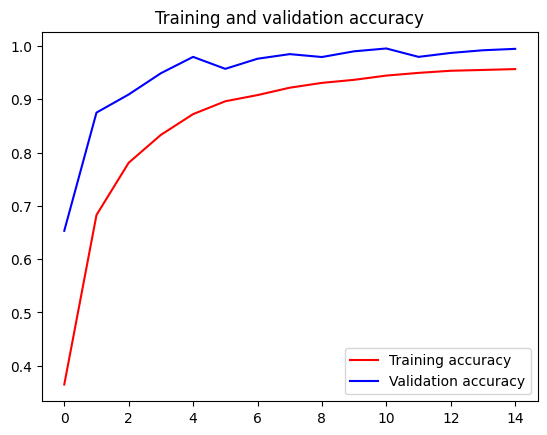

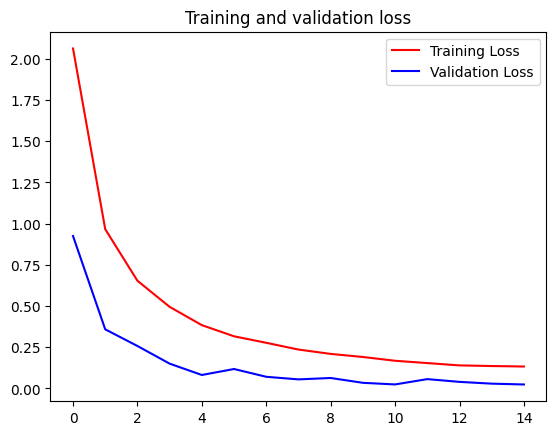

In [15]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()